In [1]:
#from pygraph.classes.graph import graph
#from pygraph.readwrite import dot
#from pygraph.algorithms.minmax import shortest_path
#from pygraph.algorithms.accessibility import connected_components
#from pygraph.algorithms.pagerank import pagerank

In [2]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [3]:
import itertools
import random
import statistics

In [4]:
from network import *

In [5]:
import math

In [6]:
from loaders import *

In [7]:
from IPython.core.display import Image, display

In [8]:
def construct_graph_filtered(old_graph, node_predicate, egde_predicate):
    new_graph = nx.Graph()
    for node in old_graph.nodes():
        if node_predicate(node):
            new_graph.add_node(node)
    for edge in old_graph.edges():
        if node_predicate(edge[0]) and node_predicate(edge[1]) and egde_predicate(edge):
            new_graph.add_edge(edge)
    return new_graph

In [9]:
# calculate distance distribution for 
# detect small world phenomenon
def get_distance_stat(graph, n):
    stat = {}
    summ = len(graph.nodes()) * n
    for i in range(n): # iterative calculation of shortest path
        random_author = random.choice(graph.nodes())
        distances = nx.shortest_path_length(graph, random_author)
        for x in distances.values():
            stat[x] = stat.get(x, 0) + 1;
    return dict( (key, value / summ) for key, value in stat.items() )
        

In [10]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [11]:
import networkx as nx
#calculate centrality statistics
def get_centrality_stat(graph):
    N = 10
    centrality_stat = nx.degree_centrality(graph)
    print("----------")
    print("Average degree node centrality:", sum(centrality_stat.values())/len(centrality_stat) )
    
    max_centrality = max(centrality_stat.values())
    print("Maxumum degree node centrality:", max_centrality)
    
    nodes_num = len(graph.nodes())
    print("Degree graph centrality:", 
          sum([max_centrality - x for x in centrality_stat.values()])/((nodes_num - 1)*(nodes_num - 2)))
    
    print("----------")
    
    return dict((key, centrality_stat.get(key)) for key in take(N, centrality_stat) )
        

In [26]:
def calc_pagerank(graph):
    TOP = 50
    percent_threshold = 0.1
    weighted_nodes = nx.pagerank(graph)
    sorted_nodes = sorted(weighted_nodes.items(), key = lambda pair: pair[1], reverse=True)
    node_ranks = dict( (val, idx) for idx, val in enumerate(sorted_nodes))
    print(sorted_nodes[0:TOP])
    top_subgraph = graph.subgraph([x[0] for x in sorted_nodes[0:TOP]])
    return (top_subgraph, weighted_nodes)
    

In [13]:
def plot_dict(stat):
    plt.plot([x for x in stat.keys()], [x for x in stat.values()])
    plt.show()

In [34]:
def plot_weighet_graph(graph, weights=None):
    if weights == None:
        weights = [1] * len(graph.nodes())
    
    nodesize = [weights[v] * 10000 for v in graph]
    try:
        pos=nx.nx_agraph.graphviz_layout(graph)
    except:
        pos=nx.spring_layout(graph,iterations=20)
    nx.draw(graph, node_size=nodesize, pos=pos, node_color="w")
    nx.draw_networkx_labels(graph, pos)
    

In [38]:
coauthorNetwork = load_with_loader("./data/out_test.txt", parse_dataset_file, lambda article: article.year < 2000)

Uniq authors: 2610


In [40]:
(subgraph, weights) = calc_pagerank(coauthorNetwork.cgr)
print(weights)
#plot_weighet_graph(subgraph, weights)

[('247930', 0.001340295185141213), ('331310', 0.001173971976561578), ('222188', 0.001053685006880209), ('321707', 0.0010326841651159986), ('81323', 0.000988371533366422), ('3323', 0.000910379917749707), ('324932', 0.0008898937552025024), ('255888', 0.0008668376020738491), ('113986', 0.0008582252770886348), ('222772', 0.0008243968642714058), ('612358', 0.0007670748286192051), ('227681', 0.0007670748286192051), ('2090', 0.0007670748286192051), ('2284', 0.0007561892497002406), ('183311', 0.0007193064655757045), ('607120', 0.0006954222840539541), ('84155', 0.0006954222840539541), ('315820', 0.0006845367051349896), ('313974', 0.0006810917751409039), ('167019', 0.0006595960117713286), ('335595', 0.0006595960117713286), ('316785', 0.0006470024565776084), ('31147', 0.0006237697394887031), ('218044', 0.0006237697394887031), ('552178', 0.0006237697394887031), ('591072', 0.0006237697394887031), ('331551', 0.0006237697394887031), ('485921', 0.0006237697394887031), ('332554', 0.0006237697394887031)

In [ ]:
def analize_component(coauthorNetwork, components, component_num):
    print("----------")
    print("Component:", component_num + 1)
    PRECISION = 50 # number of authors to calc avg distance

    component_sizes = dict( (idx, len(c)) for idx, c in enumerate(components) )

    the_component = components[component_num]

    component_subgraph = coauthorNetwork.gr.subgraph(the_component)
    
    print("Authors count:",len(component_subgraph.nodes()))
    stat = get_distance_stat(component_subgraph, PRECISION)
    
    print("Mean distance:", sum([value * key for key, value in stat.items()]))
    print(" ")
    print("Distance distribution")
    plot_dict(stat)
    
    cstat = get_centrality_stat(coauthorNetwork.cgr)
    print("Degree Nodes Centrality (first N elements):", cstat)
    #print(stat)



In [30]:
def load_with_loader(file, loader, article_filter = None):
    coauthorNetwork = CoauthorNetwork()
    if article_filter == None:
        article_filter = lambda x: True
    for article in loader(file):
        if article_filter(article):
            coauthorNetwork.add_article(article)

    print("Uniq authors:", len([x for x in coauthorNetwork.author_to_article.keys()]))
    return coauthorNetwork
    
#file = "./data/authors/Medical Informatics.txt"
#file = "./data/out_test.txt"
#coauthorNetwork = analyse(file, parse_dataset_file)
#components = connected_components(coauthorNetwork.gr)


#!dot 'graph.dot' -Tpng -o "graph.png"
#display(Image('graph.png' ))

In [32]:
def run_analyse(file, article_filter = None):
    print("Dataset:", file)
    coauthorNetwork = load_with_loader(file, parse_dataset_file, article_filter)
    
    components = [c for c in sorted(nx.connected_components(coauthorNetwork.gr), key=len, reverse=True)]
    
    components_sizes = dict((idx, math.log10(float(len(c)))) for idx, c in enumerate(components))
    print(" ")
    print("Connected component distribution (log-scale)")
    plot_dict(components_sizes)
    
    #components = connected_components(coauthorNetwork.gr)
    component_count = len(components)
    print("Connected component count:", component_count)
    
    analize_component(coauthorNetwork, components, 0)

Dataset: ./data/out_test.txt
Uniq authors: 42619
 
Connected component distribution (log-scale)


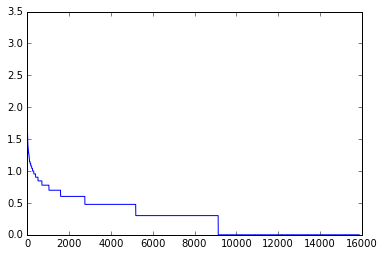

Connected component count: 15871


NameError: name 'analize_component' is not defined

In [35]:
run_analyse("./data/out_test.txt")
#run_analyse("./data/authors/Database.txt")
#run_analyse("./data/authors/Data Mining.txt")
#run_analyse("./data/authors/Theory.txt")
#run_analyse("./data/authors/Visualization.txt")
